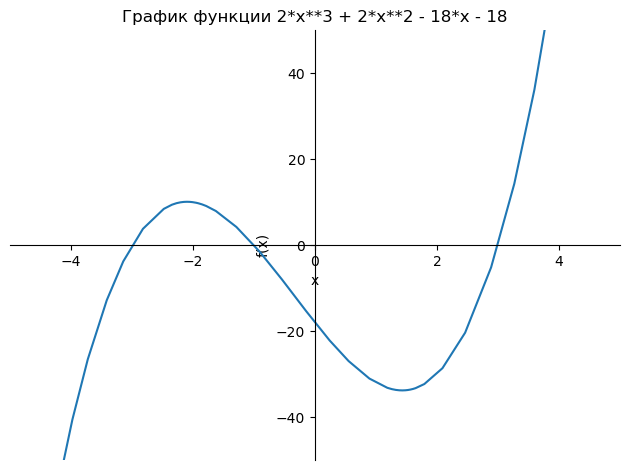

In [10]:
from sympy import *
from sympy.plotting import plot
x=Symbol('x')
# init_printing()
# f=x**2+2*x-30
# f=-18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
f= 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18
# f=(x ** 2 + 3) / (3 * (x + 1))
p=plot(f,title=f'График функции {f}', axis_center=(0,0),ylim=(-50,50), xlim=(-5,5))
#  (x, -10, 10), (y, -10, 10)
# p.save('plot.png')



### **1. Определение корней функции**

In [12]:
u=solveset(f,x, Reals)
if len(u)==0:
  print("Действительных корней нет")
else:
  for i in u:
    print(i.evalf(3), end="\n")


-3.00
-1.00
3.00


### **2. Интервалы возрастания и убывания функции**

In [17]:

d1=diff(f)
print(f"первая произодная функции {f}:", d1)
d1_root = sorted(solveset(d1,x, Reals))
print("корни производной:", d1_root)
interval_d1_root=[-oo,*solveset(d1,x).evalf(3),oo]
print("интервалы призводной:", interval_d1_root)

incr_list = []
decr_list = []

for i in range(1, len(interval_d1_root)):
    val = is_increasing(f, Interval.open(interval_d1_root[i - 1], interval_d1_root[i]))
    if val:
        incr_list.append(f"[{interval_d1_root[i - 1]}, {interval_d1_root[i]}]")
    else:
        decr_list.append(f"[{interval_d1_root[i - 1]}, {interval_d1_root[i]}]")

print(f"\nИнтервалы возрастания и убывания функции {f}:")
print(f"Убывает на интервалах:", *decr_list, sep="\n")
print(f"Возрастает на интервалах:", *incr_list, sep="\n")


первая произодная функции 2*x**3 + 2*x**2 - 18*x - 18: 6*x**2 + 4*x - 18
корни производной: [-2*sqrt(7)/3 - 1/3, -1/3 + 2*sqrt(7)/3]
интервалы призводной: [-oo, -2.10, 1.43, oo]

Интервалы возрастания и убывания функции 2*x**3 + 2*x**2 - 18*x - 18:
Убывает на интервалах:
[-2.10, 1.43]
Возрастает на интервалах:
[-oo, -2.10]
[1.43, oo]


### **3. Экстремумы функции**

In [32]:

d1=diff(f)
print(f"первая произодная функции {f}:", d1)
d1_root = sorted(solveset(d1,x, Reals))
print("корни производной:", [i.evalf(3) for i in d1_root])
interval_d1_root=[-oo,*d1_root,oo]
print("интервалы призводной:", [i.evalf(3) for i in interval_d1_root])



max_list = []
min_list = []
middle_list = []
if len(interval_d1_root)>2:
    for i in range(1, len(interval_d1_root)-1):
        val_1 = is_increasing(f, Interval.open(interval_d1_root[i - 1], interval_d1_root[i]))
        val_2 = is_increasing(f, Interval.open(interval_d1_root[i], interval_d1_root[i+1]))
        print(val_1 ,val_2)
        if val_1 ==True and val_2 ==False:
            max_list.append(f"[{interval_d1_root[i].evalf(2)}, {f.subs(x, interval_d1_root[i]).evalf(2)}]")
        elif  val_1 ==False and val_2 ==True:
             min_list.append(f"[{interval_d1_root[i].evalf(2)},  {f.subs(x, interval_d1_root[i]).evalf(2)}]")
        else:
           middle_list.append(f"[{interval_d1_root[i]}]")
    print(f"\nЭкстремумы функции {f}:")
    print(f"Локальные максимумы:", *max_list, sep="\n")
    print(f"Локальные минимумы:", *min_list, sep="\n")
    print(f"Точки перегиба:", *middle_list, sep="\n")
else:
    print("функция не имеет экстремумов")

первая произодная функции 2*x**3 + 2*x**2 - 18*x - 18: 6*x**2 + 4*x - 18
корни производной: [-2.10, 1.43]
интервалы призводной: [-oo, -2.10, 1.43, oo]
True False
False True

Экстремумы функции 2*x**3 + 2*x**2 - 18*x - 18:
Локальные максимумы:
[-2.1, 10]
Локальные минимумы:
[1.4,  -34]
Точки перегиба:


### **4.  Интервалы знакопостоянства функции**

In [33]:
interval_roots = [-oo, oo]
f_roots=sorted(solve(f, x))
print(f"корни функции {f}:", f_roots)
interval_roots[1:1] = sorted(solve(f, x))
print("интервалы функции ", interval_roots)

pozitive_list = []
negative_list = []

for i in range(1, len(interval_roots)):
    num_1, num_2 = interval_roots[i - 1], interval_roots[i]
   
    num_1 =  interval_roots[1]-10 if i==1 else num_1
    num_2= interval_roots[-2]+10 if i==len(interval_roots)-1 else num_2

    val=f.subs(x,num_2-(num_2-num_1)/2)

    num_1=interval_roots[0] if num_1<interval_roots[1] else num_1
    num_2=interval_roots[-1] if num_2>interval_roots[-2] else num_2
    
    if val<0:
        negative_list.append(f"[{num_1}, {num_2}]") 
    else:
        pozitive_list.append(f"[{num_1}, {num_2}]")

print("f > 0:", *pozitive_list, sep="\n")
print("\nf < 0:", *negative_list, sep="\n")

корни функции 2*x**3 + 2*x**2 - 18*x - 18: [-3, -1, 3]
интервалы функции  [-oo, -3, -1, 3, oo]
f > 0:
[-3, -1]
[3, oo]

f < 0:
[-oo, -3]
[-1, 3]
